In [1]:
import pandas as pd
import numpy as np
from pandas import read_excel
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
my_sheet='datasheet'
file_name='customer_retention_dataset.xlsx'

In [3]:
data=read_excel(file_name,sheet_name=my_sheet)

In [4]:
data

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


#### Checking the shape of the dataset

In [5]:
data.shape

(269, 71)

There are 269 rows and 71 columns in the data set

#### Describing the dataset

In [6]:
data.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


Since it is showing only int and float columns i.e:only 1 column is of int dtype and the rest are of object dtype

# EDA

#### Checking for the null values

In [7]:
data.isna().sum().sum()

0

#### Checking the datatypes of the columns

In [8]:
data.dtypes
    

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [9]:
a=0
for i in data.columns:
    if data[i].dtypes=="object":
        a+=1
print(a)

70


In [10]:
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

#### First of all lets change the column names 

In [11]:
data.columns=['Gender','Age','City','Pincode','Years of shopping','No. of Purchases(last 1 year)','Mode of Internet','Device Used','Screen Size','OS','Browser name','Channel','how do you reach the online retail store','Exploring website time','Payment mode','How frequently abandon your shopping cart','Why abbandon shopping cart','Content rating','Information on similar product comparision','Complete information for purchase decision','Relevent information stated clearly or not','Ease of navigation','Loading and processing speed','User friendly Interface','Convenient Payment methods','Trust','Empathy towards the customer','able to guarantee the privacy of the customer','Responsiveness','benefit and discounts','Enjoyment','convenient and flexible','Return and replacement policy','access to loyalty programs','Displaying quality Information','User derive satisfaction','Net Benefit derived','User satisfaction cannot exist without trust','wide variety of listed product','complete and relevant product information','Monetary savings','Convenience of patronizing the online retailer','Shopping on the website gives you the sense of adventure','enhances your social status','feel gratification','Shopping on website helps you fulfill certain roles','Getting value for money spent','online retailers you have shopped from','Easy to use website','Visual appealing web-page layout','Wild variety of product on offer','relevant description information of products','Fast loading website speed of website and application','Reliability of the website or application','Quickness to complete purchase','Availability of several payment options','Speedy order delivery','Privacy of customer information','Security of customer financial information','Perceived Trustworthiness','Presence of online assistance through multi-channel','Longer time to get logged in','Longer time in displaying graphics and photos','Late declaration of price','Longer page loading time','mode of payment on most products','Longer delivery period','Change in website/Application design','Frequent disruption when moving from one page to another','Website is as efficient as before','online retailer would you recommend']

In [12]:
data

,Gender,Age,City,Pincode,Years of shopping,No. of Purchases(last 1 year),Mode of Internet,Device Used,Screen Size,OS,...,Longer time to get logged in,Longer time in displaying graphics and photos,Late declaration of price,Longer page loading time,mode of payment on most products,Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,online retailer would you recommend
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


Now the column names looks better

### Visualization of the Columns

Female    181
Male       88
Name: Gender, dtype: int64


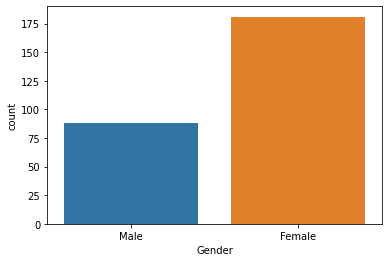

In [13]:
ax=sns.countplot(x='Gender',data=data)
print(data['Gender'].value_counts())

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


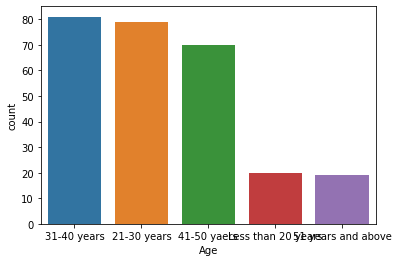

In [14]:
ax=sns.countplot(x='Age',data=data)
print(data['Age'].value_counts())

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64


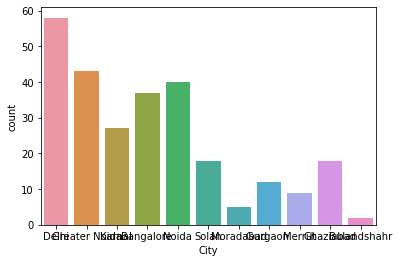

In [15]:
ax=sns.countplot(x='City',data=data)
print(data['City'].value_counts())

201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068     5
201005     4
110009     4
110042     4
110039     4
110030     4
201304     4
122009     4
201303     4
560018     4
201001     4
560003     4
560002     4
560013     3
203001     2
203207     1
560001     1
203202     1
Name: Pincode, dtype: int64


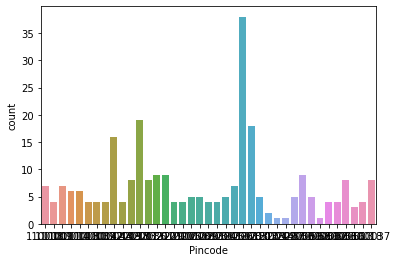

In [16]:
ax=sns.countplot(x='Pincode',data=data)
print(data['Pincode'].value_counts())

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Years of shopping, dtype: int64


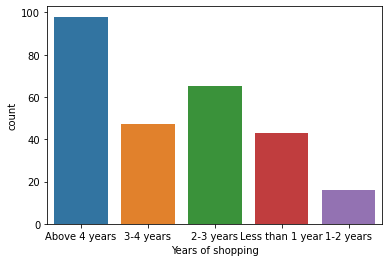

In [17]:
ax=sns.countplot(x='Years of shopping',data=data)
print(data['Years of shopping'].value_counts())

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: No. of Purchases(last 1 year), dtype: int64


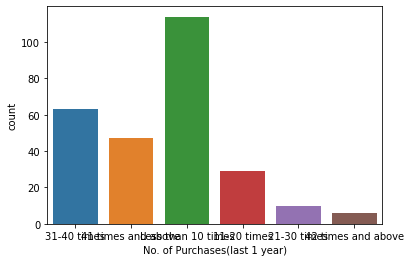

In [18]:
ax=sns.countplot(x='No. of Purchases(last 1 year)',data=data)
print(data['No. of Purchases(last 1 year)'].value_counts())

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: Mode of Internet, dtype: int64


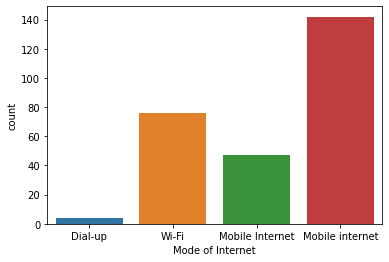

In [19]:
ax=sns.countplot(x='Mode of Internet',data=data)
print(data['Mode of Internet'].value_counts())

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Device Used, dtype: int64


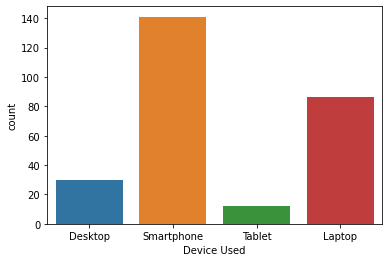

In [20]:
ax=sns.countplot(x='Device Used',data=data)
print(data['Device Used'].value_counts())

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: Screen Size, dtype: int64


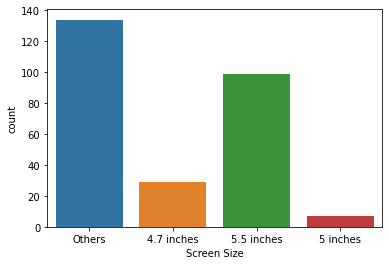

In [21]:
ax=sns.countplot(x='Screen Size',data=data)
print(data['Screen Size'].value_counts())

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


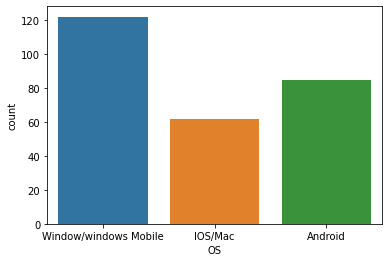

In [22]:
ax=sns.countplot(x='OS',data=data)
print(data['OS'].value_counts())

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: Browser name, dtype: int64


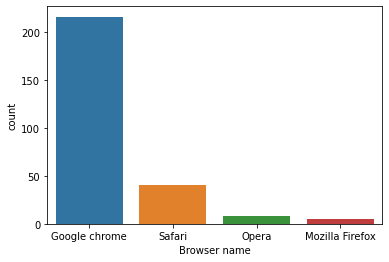

In [23]:
ax=sns.countplot(x='Browser name',data=data)
print(data['Browser name'].value_counts())

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Channel, dtype: int64


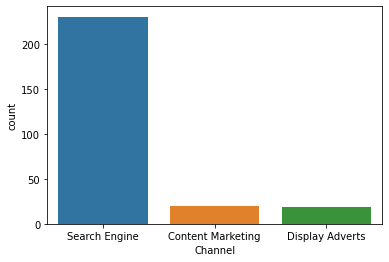

In [24]:
ax=sns.countplot(x='Channel',data=data)
print(data['Channel'].value_counts())

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: how do you reach the online retail store, dtype: int64


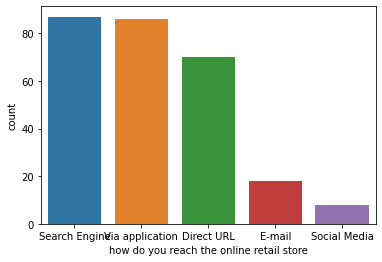

In [25]:
ax=sns.countplot(x='how do you reach the online retail store',data=data)
print(data['how do you reach the online retail store'].value_counts())

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: Exploring website time, dtype: int64


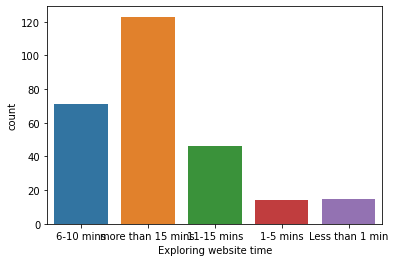

In [26]:
ax=sns.countplot(x='Exploring website time',data=data)
print(data['Exploring website time'].value_counts())

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Payment mode, dtype: int64


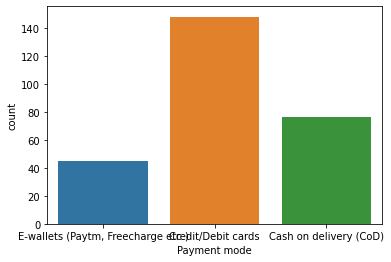

In [27]:
ax=sns.countplot(x='Payment mode',data=data)
print(data['Payment mode'].value_counts())

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: How frequently abandon your shopping cart, dtype: int64


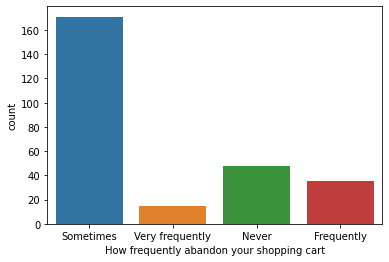

In [28]:
ax=sns.countplot(x='How frequently abandon your shopping cart',data=data)
print(data['How frequently abandon your shopping cart'].value_counts())

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Why abbandon shopping cart, dtype: int64


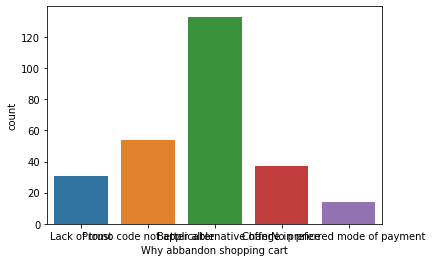

In [29]:
ax=sns.countplot(x='Why abbandon shopping cart',data=data)
print(data['Why abbandon shopping cart'].value_counts())

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: Content rating, dtype: int64


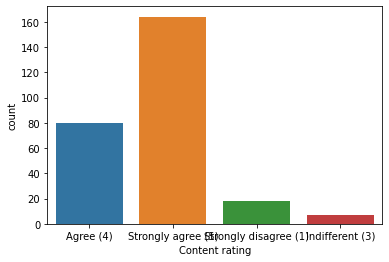

In [30]:
ax=sns.countplot(x='Content rating',data=data)
print(data['Content rating'].value_counts())

Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: Information on similar product comparision, dtype: int64


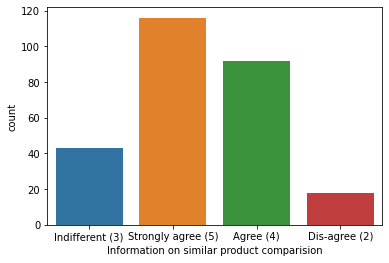

In [31]:
ax=sns.countplot(x='Information on similar product comparision',data=data)
print(data['Information on similar product comparision'].value_counts())

Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: Complete information for purchase decision, dtype: int64


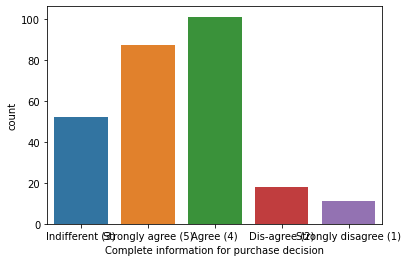

In [32]:
ax=sns.countplot(x='Complete information for purchase decision',data=data)
print(data['Complete information for purchase decision'].value_counts())

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: Relevent information stated clearly or not, dtype: int64


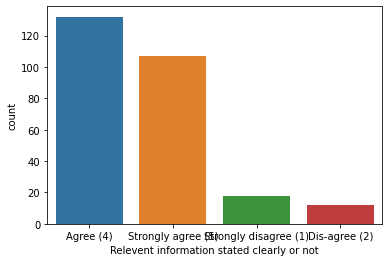

In [33]:
ax=sns.countplot(x='Relevent information stated clearly or not',data=data)
print(data['Relevent information stated clearly or not'].value_counts())

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: Ease of navigation, dtype: int64


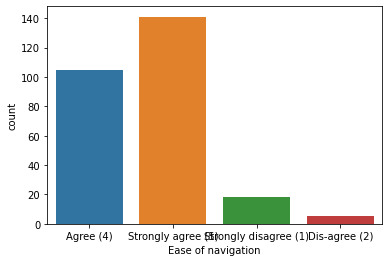

In [34]:
ax=sns.countplot(x='Ease of navigation',data=data)
print(data['Ease of navigation'].value_counts())

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: Loading and processing speed, dtype: int64


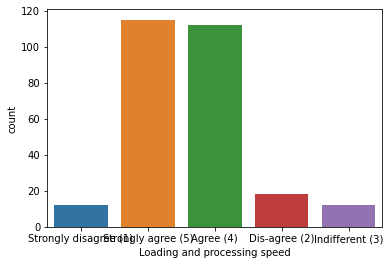

In [35]:
ax=sns.countplot(x='Loading and processing speed',data=data)
print(data['Loading and processing speed'].value_counts())

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: User friendly Interface, dtype: int64


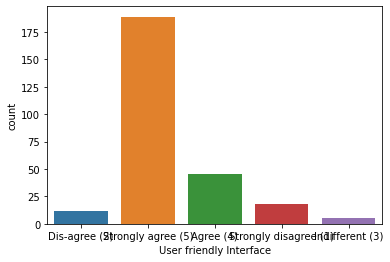

In [36]:
ax=sns.countplot(x='User friendly Interface',data=data)
print(data['User friendly Interface'].value_counts())

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: Convenient Payment methods, dtype: int64


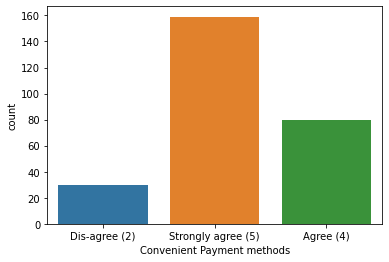

In [37]:
ax=sns.countplot(x='Convenient Payment methods',data=data)
print(data['Convenient Payment methods'].value_counts())

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: Trust, dtype: int64


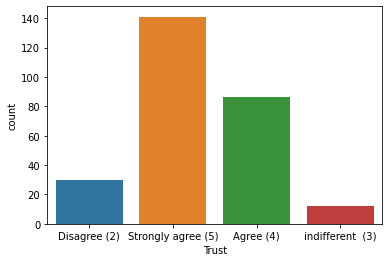

In [38]:
ax=sns.countplot(x='Trust',data=data)
print(data['Trust'].value_counts())

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: Empathy towards the customer, dtype: int64


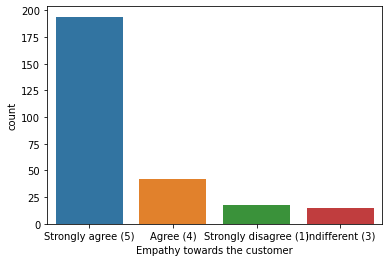

In [39]:
ax=sns.countplot(x='Empathy towards the customer',data=data)
print(data['Empathy towards the customer'].value_counts())

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: able to guarantee the privacy of the customer, dtype: int64


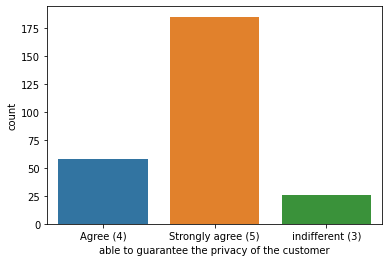

In [40]:
ax=sns.countplot(x='able to guarantee the privacy of the customer',data=data)
print(data['able to guarantee the privacy of the customer'].value_counts())

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: Responsiveness, dtype: int64


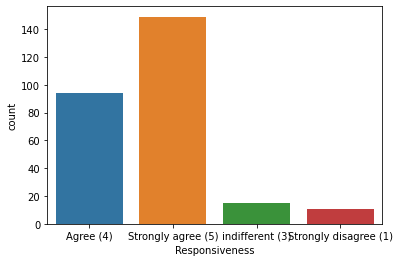

In [41]:
ax=sns.countplot(x='Responsiveness',data=data)
print(data['Responsiveness'].value_counts())

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: benefit and discounts, dtype: int64


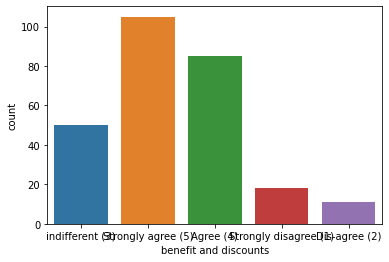

In [42]:
ax=sns.countplot(x='benefit and discounts',data=data)
print(data['benefit and discounts'].value_counts())

Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: Enjoyment, dtype: int64


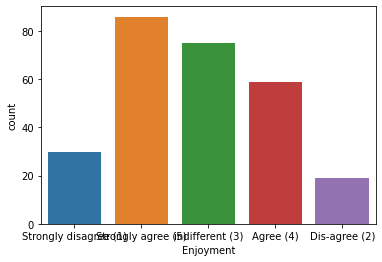

In [43]:
ax=sns.countplot(x='Enjoyment',data=data)
print(data['Enjoyment'].value_counts())

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: convenient and flexible, dtype: int64


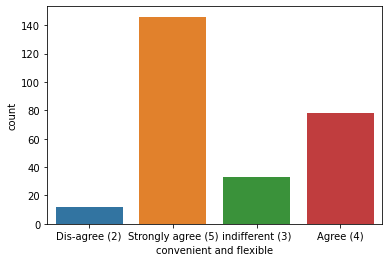

In [44]:
ax=sns.countplot(x='convenient and flexible',data=data)
print(data['convenient and flexible'].value_counts())

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: Return and replacement policy, dtype: int64


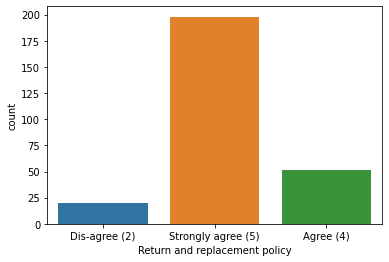

In [45]:
ax=sns.countplot(x='Return and replacement policy',data=data)
print(data['Return and replacement policy'].value_counts())

Strongly agree (5)       115
indifferent (3)           64
Agree (4)                 64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: access to loyalty programs, dtype: int64


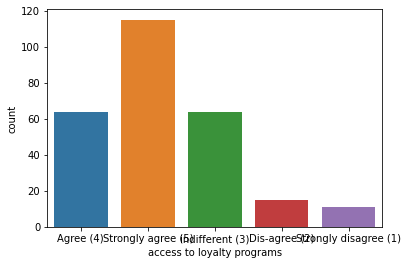

In [46]:
ax=sns.countplot(x='access to loyalty programs',data=data)
print(data['access to loyalty programs'].value_counts())

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: Displaying quality Information, dtype: int64


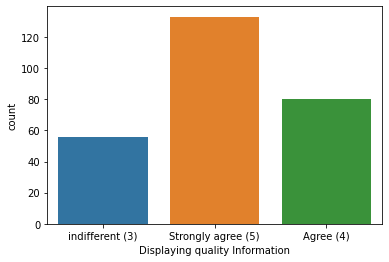

In [47]:
ax=sns.countplot(x='Displaying quality Information',data=data)
print(data['Displaying quality Information'].value_counts())

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: User derive satisfaction, dtype: int64


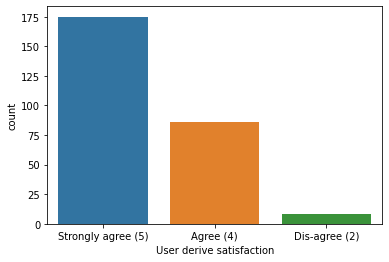

In [48]:
ax=sns.countplot(x='User derive satisfaction',data=data)
print(data['User derive satisfaction'].value_counts())

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: Net Benefit derived, dtype: int64


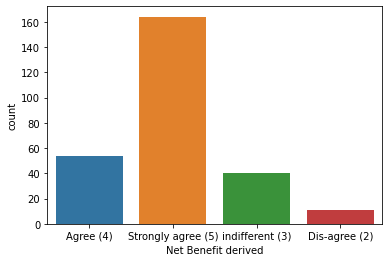

In [49]:
ax=sns.countplot(x='Net Benefit derived',data=data)
print(data['Net Benefit derived'].value_counts())

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: User satisfaction cannot exist without trust, dtype: int64


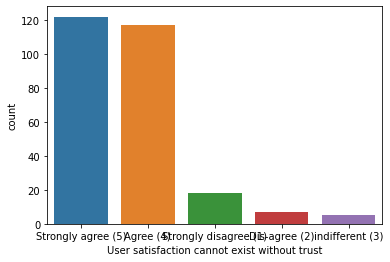

In [50]:
ax=sns.countplot(x='User satisfaction cannot exist without trust',data=data)
print(data['User satisfaction cannot exist without trust'].value_counts())

Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: wide variety of listed product, dtype: int64


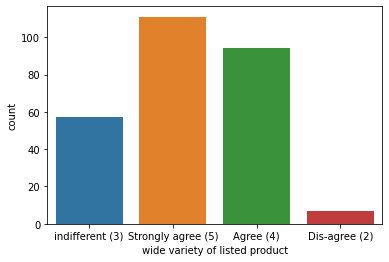

In [51]:
ax=sns.countplot(x='wide variety of listed product',data=data)
print(data['wide variety of listed product'].value_counts())

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: complete and relevant product information, dtype: int64


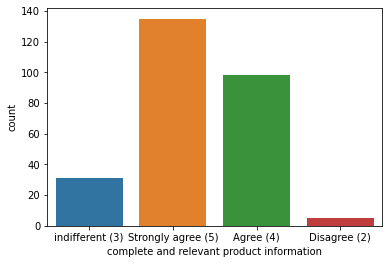

In [52]:
ax=sns.countplot(x='complete and relevant product information',data=data)
print(data['complete and relevant product information'].value_counts())

Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: Monetary savings, dtype: int64


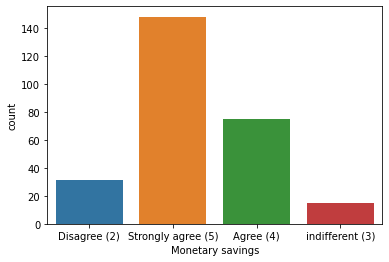

In [53]:
ax=sns.countplot(x='Monetary savings',data=data)
print(data['Monetary savings'].value_counts())

Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: Convenience of patronizing the online retailer, dtype: int64


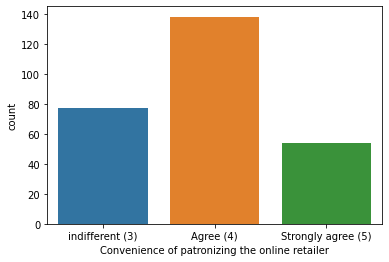

In [54]:
ax=sns.countplot(x='Convenience of patronizing the online retailer',data=data)
print(data['Convenience of patronizing the online retailer'].value_counts())

Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: Shopping on the website gives you the sense of adventure, dtype: int64


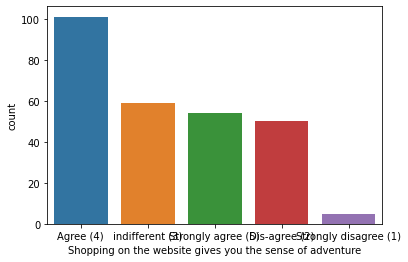

In [55]:
ax=sns.countplot(x='Shopping on the website gives you the sense of adventure',data=data)
print(data['Shopping on the website gives you the sense of adventure'].value_counts())

indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: enhances your social status, dtype: int64


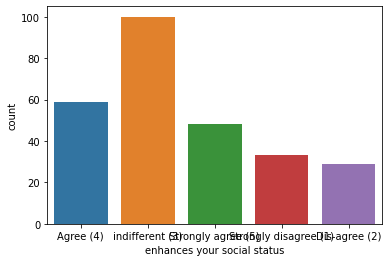

In [56]:
ax=sns.countplot(x='enhances your social status',data=data)
print(data['enhances your social status'].value_counts())

indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: feel gratification, dtype: int64


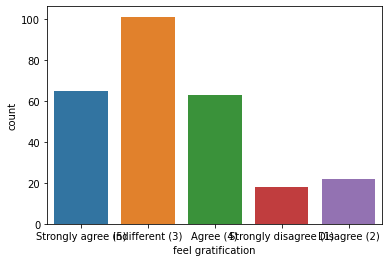

In [57]:
ax=sns.countplot(x='feel gratification',data=data)
print(data['feel gratification'].value_counts())

indifferent (3)          88
Agree (4)                88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: Shopping on website helps you fulfill certain roles, dtype: int64


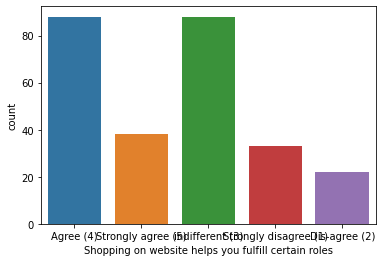

In [58]:
ax=sns.countplot(x='Shopping on website helps you fulfill certain roles',data=data)
print(data['Shopping on website helps you fulfill certain roles'].value_counts())

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: Getting value for money spent, dtype: int64


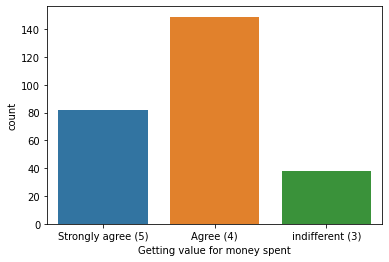

In [59]:
ax=sns.countplot(x='Getting value for money spent',data=data)
print(data['Getting value for money spent'].value_counts())

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: online retailers you have shopped from, dtype: int64


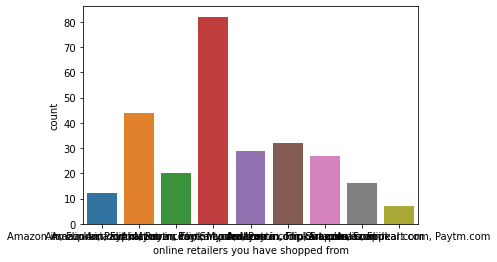

In [60]:
ax=sns.countplot(x='online retailers you have shopped from',data=data)
print(data['online retailers you have shopped from'].value_counts())

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website, dtype: int64


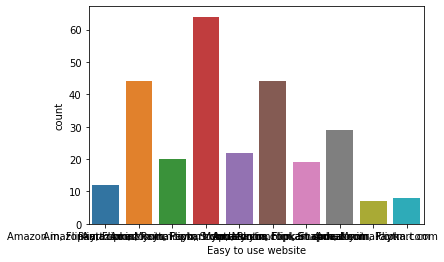

In [61]:
ax=sns.countplot(x='Easy to use website',data=data)
print(data['Easy to use website'].value_counts())

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64


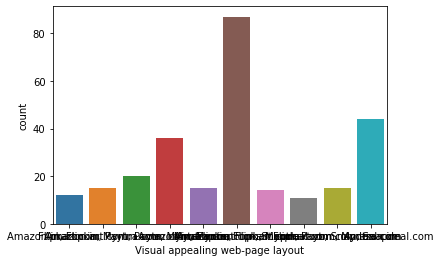

In [62]:
ax=sns.countplot(x='Visual appealing web-page layout',data=data)
print(data['Visual appealing web-page layout'].value_counts())

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64


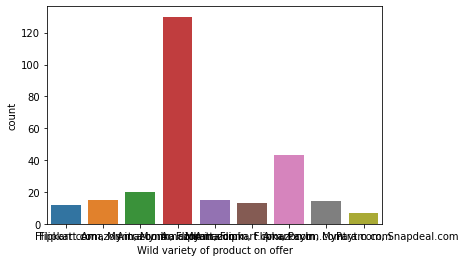

In [63]:
ax=sns.countplot(x='Wild variety of product on offer',data=data)
print(data['Wild variety of product on offer'].value_counts())

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: relevant description information of products, dtype: int64


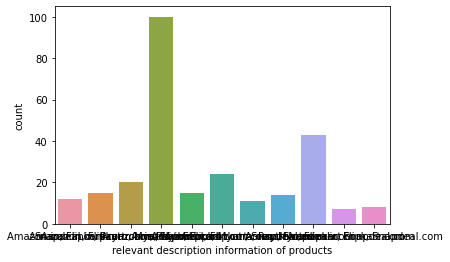

In [64]:
ax=sns.countplot(x='relevant description information of products',data=data)
print(data['relevant description information of products'].value_counts())

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64


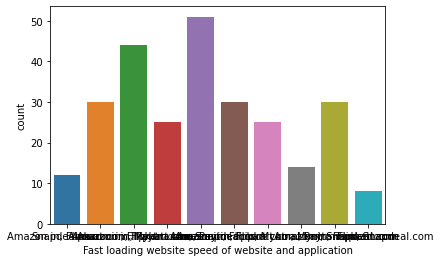

In [65]:
ax=sns.countplot(x='Fast loading website speed of website and application',data=data)
print(data['Fast loading website speed of website and application'].value_counts())

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64


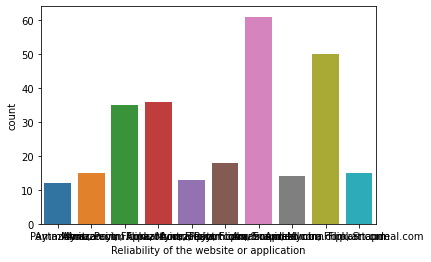

In [66]:
ax=sns.countplot(x='Reliability of the website or application',data=data)
print(data['Reliability of the website or application'].value_counts())

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64


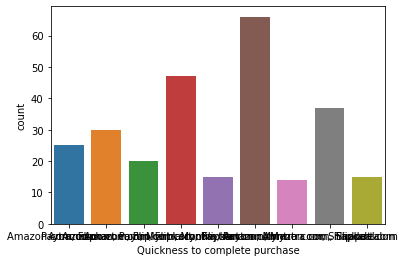

In [67]:
ax=sns.countplot(x='Quickness to complete purchase',data=data)
print(data['Quickness to complete purchase'].value_counts())

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64


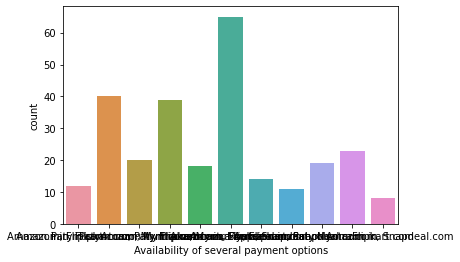

In [68]:
ax=sns.countplot(x='Availability of several payment options',data=data)
print(data['Availability of several payment options'].value_counts())

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Flipkart.com                               15
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery, dtype: int64


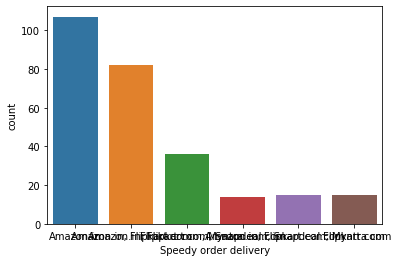

In [69]:
ax=sns.countplot(x='Speedy order delivery',data=data)
print(data['Speedy order delivery'].value_counts())

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Flipkart.com                                                    15
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customer information, dtype: int64


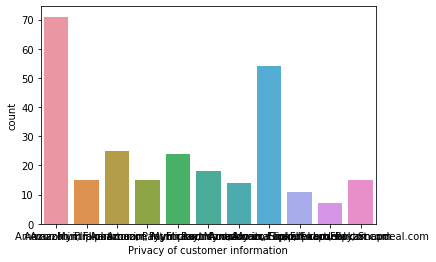

In [70]:
ax=sns.countplot(x='Privacy of customer information',data=data)
print(data['Privacy of customer information'].value_counts())

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64


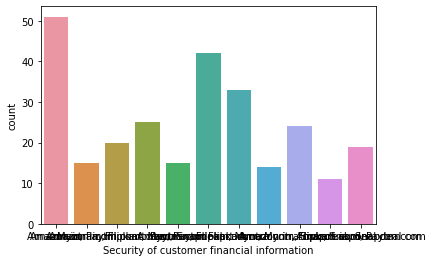

In [71]:
ax=sns.countplot(x='Security of customer financial information',data=data)
print(data['Security of customer financial information'].value_counts())

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64


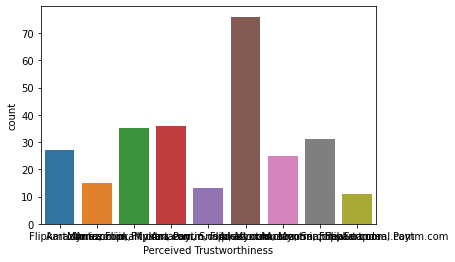

In [72]:
ax=sns.countplot(x='Perceived Trustworthiness',data=data)
print(data['Perceived Trustworthiness'].value_counts())

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64


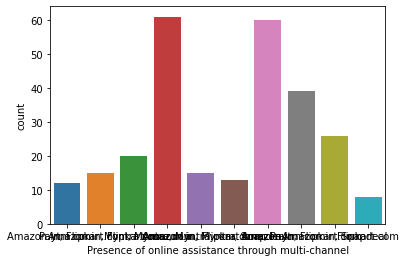

In [73]:
ax=sns.countplot(x='Presence of online assistance through multi-channel',data=data)
print(data['Presence of online assistance through multi-channel'].value_counts())

Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in, dtype: int64


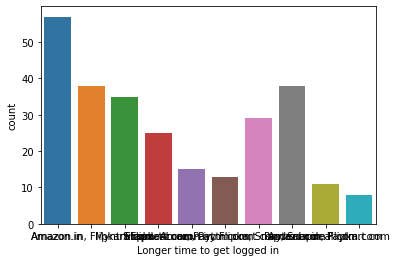

In [74]:
ax=sns.countplot(x='Longer time to get logged in',data=data)
print(data['Longer time to get logged in'].value_counts())

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Flipkart.com                           15
Paytm.com                              15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos, dtype: int64


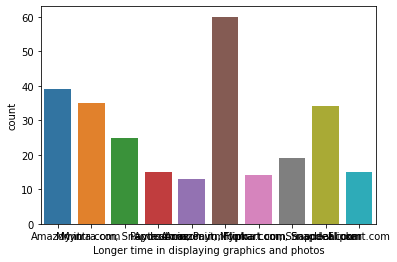

In [75]:
ax=sns.countplot(x='Longer time in displaying graphics and photos',data=data)
print(data['Longer time in displaying graphics and photos'].value_counts())

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price, dtype: int64


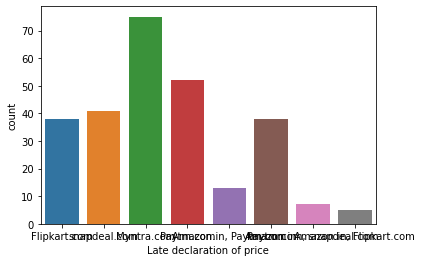

In [76]:
ax=sns.countplot(x='Late declaration of price',data=data)
print(data['Late declaration of price'].value_counts())

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time, dtype: int64


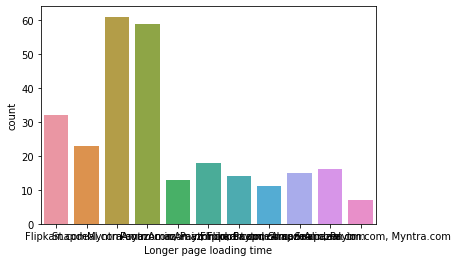

In [77]:
ax=sns.countplot(x='Longer page loading time',data=data)
print(data['Longer page loading time'].value_counts())

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: mode of payment on most products, dtype: int64


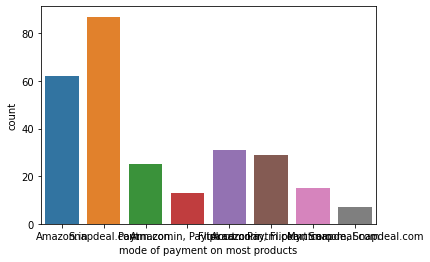

In [78]:
ax=sns.countplot(x='mode of payment on most products',data=data)
print(data['mode of payment on most products'].value_counts())

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Myntra.com                 26
Paytm.com, Snapdeal.com    26
Name: Longer delivery period, dtype: int64


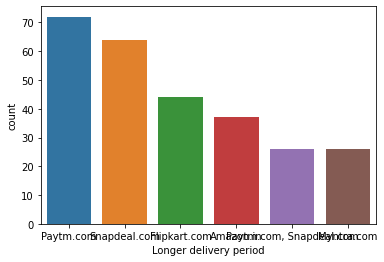

In [79]:
ax=sns.countplot(x='Longer delivery period',data=data)
print(data['Longer delivery period'].value_counts())

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


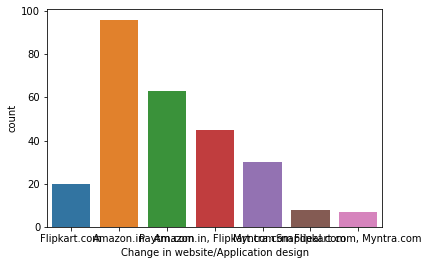

In [80]:
ax=sns.countplot(x='Change in website/Application design',data=data)
print(data['Change in website/Application design'].value_counts())

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64


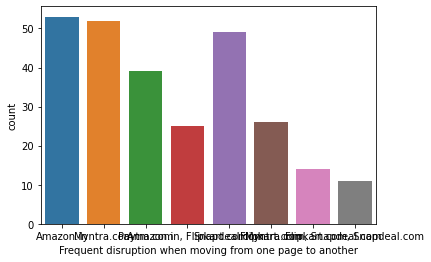

In [81]:
ax=sns.countplot(x='Frequent disruption when moving from one page to another',data=data)
print(data['Frequent disruption when moving from one page to another'].value_counts())

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64


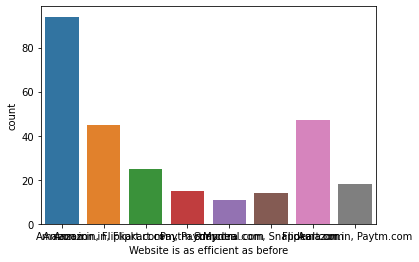

In [82]:
ax=sns.countplot(x='Website is as efficient as before',data=data)
print(data['Website is as efficient as before'].value_counts())

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: online retailer would you recommend, dtype: int64


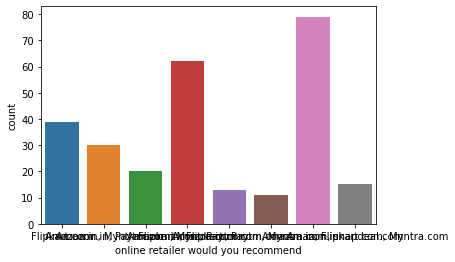

In [83]:
ax=sns.countplot(x='online retailer would you recommend',data=data)
print(data['online retailer would you recommend'].value_counts())

### Encoding the dataset

In [84]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

### Checking outliers using Boxplot

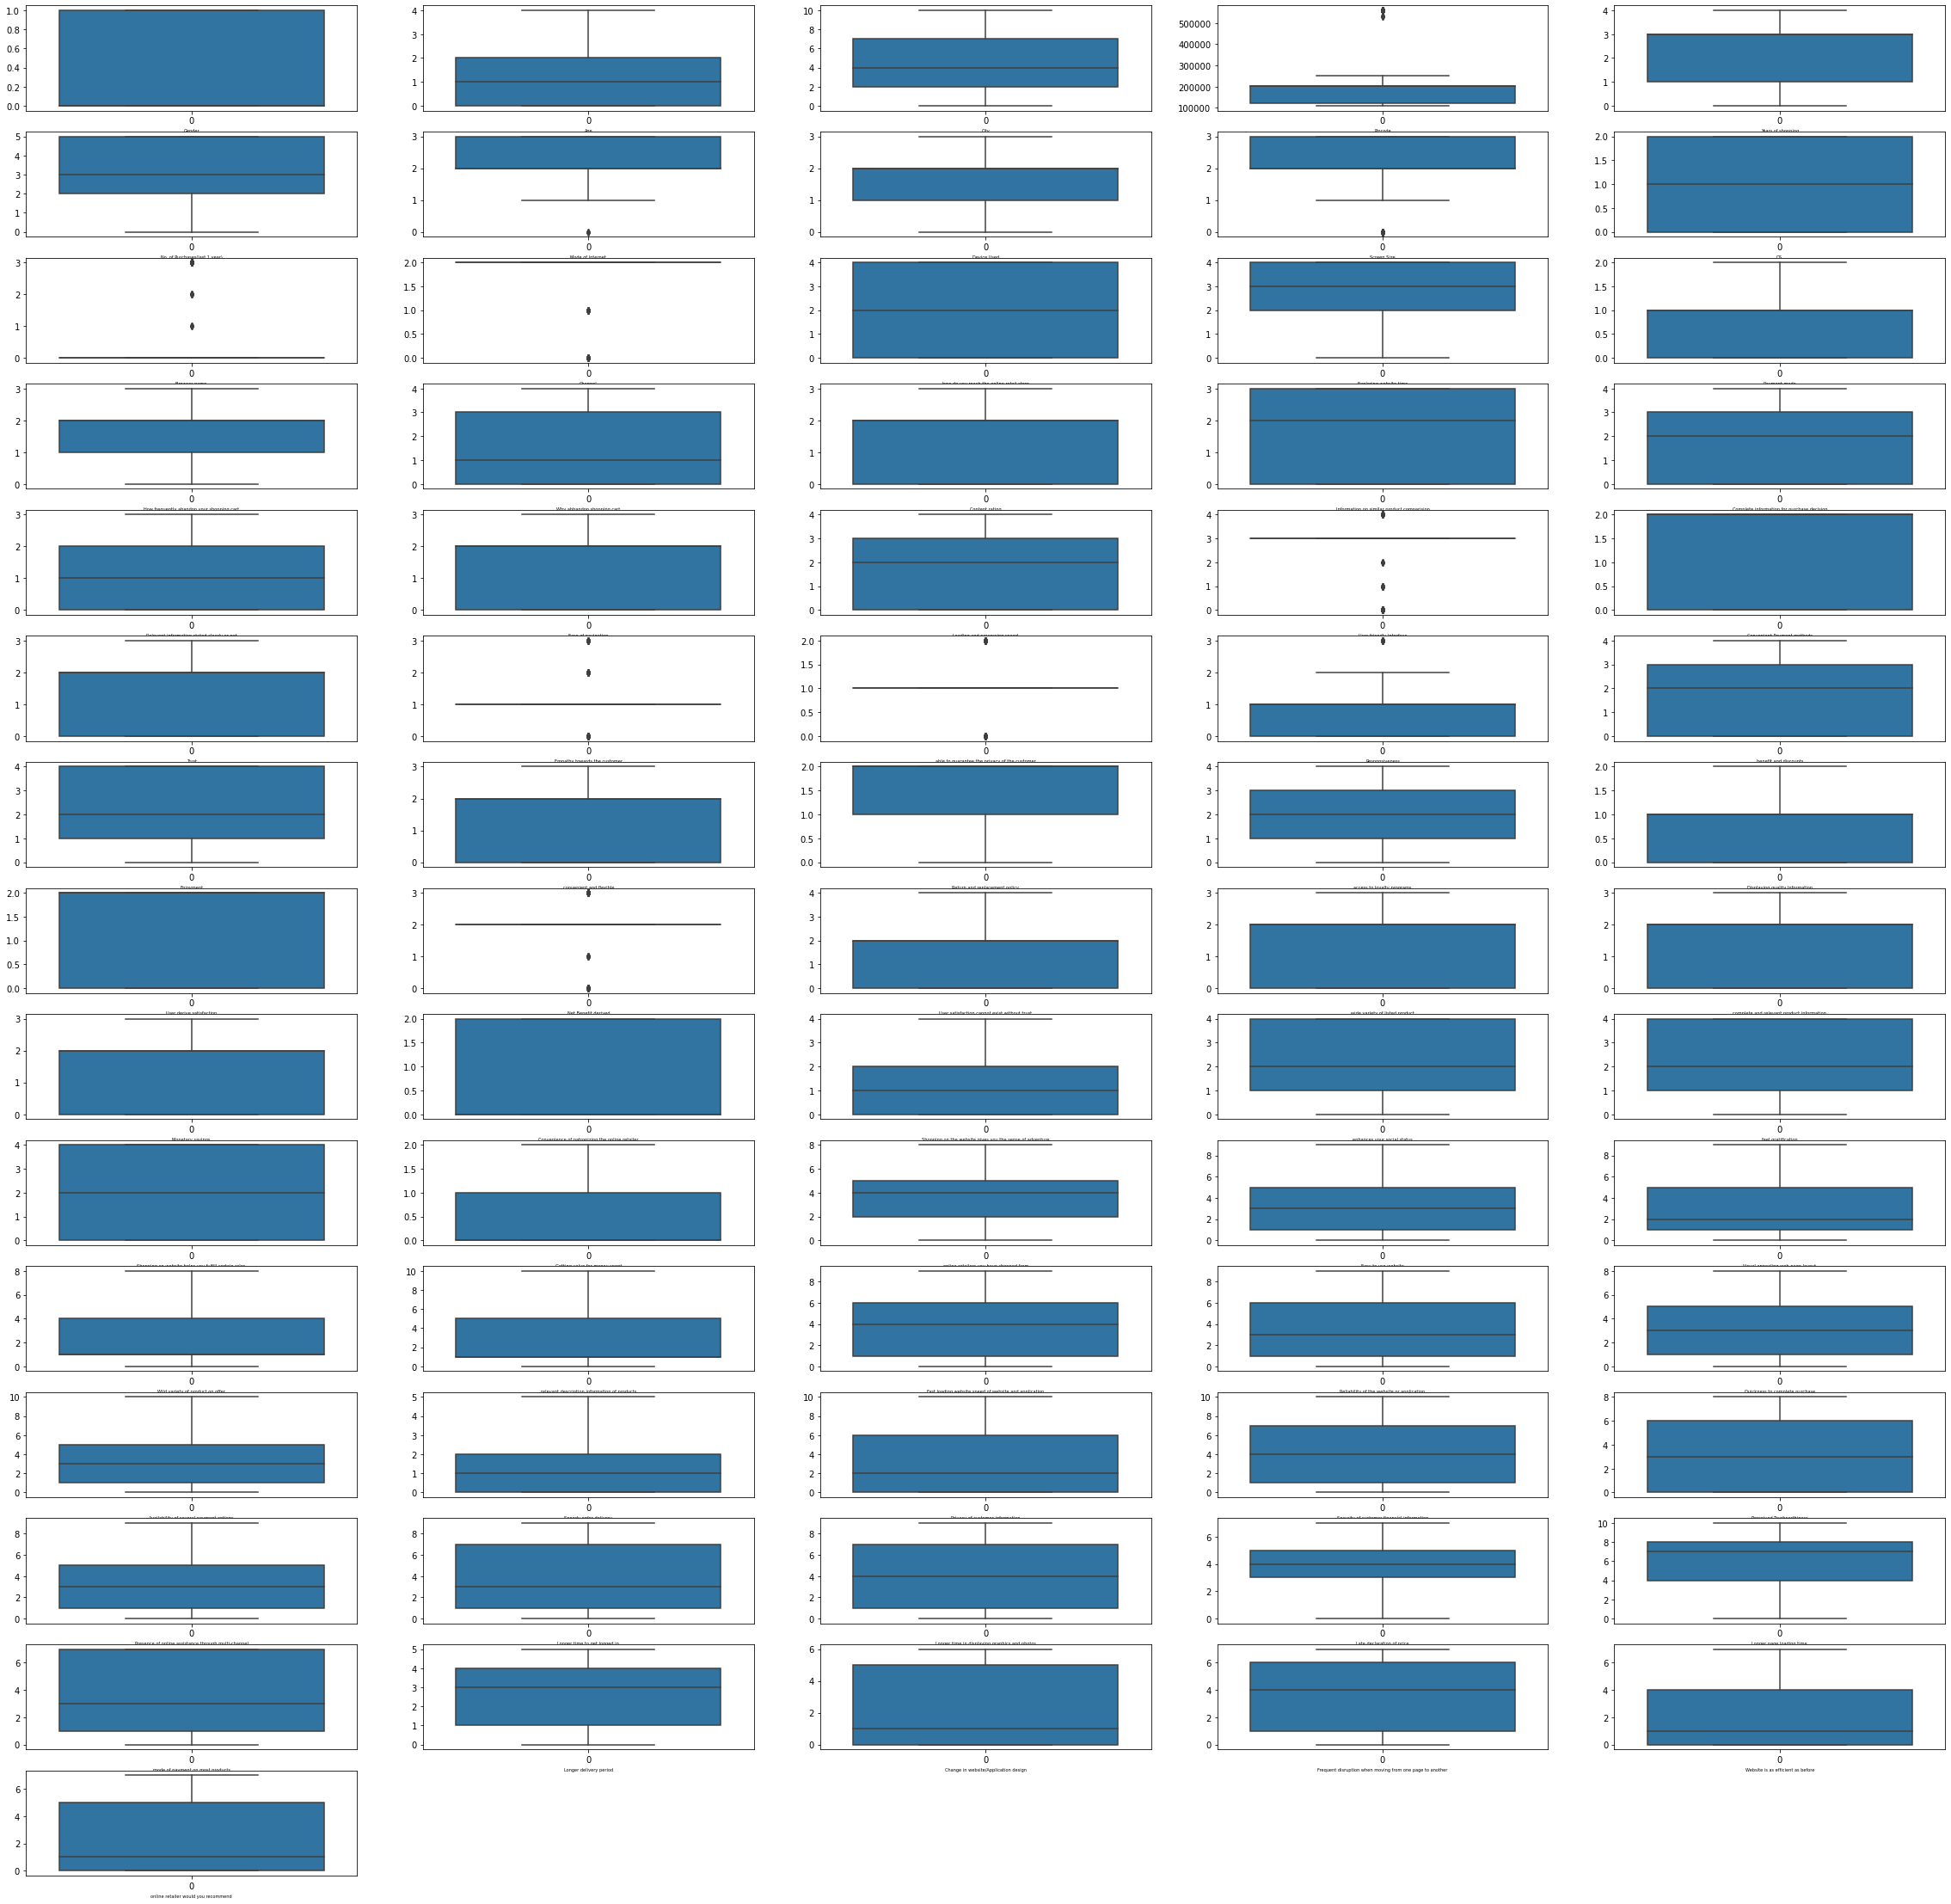

In [85]:
plt.figure(figsize=(40,40))
plotnumber=1
for column in data:
    if plotnumber<=75:
        ax=plt.subplot(15,5,plotnumber)
        sns.boxplot(data=data[column],orient='v')
        plt.xlabel(column,fontsize=5)
    plotnumber+=1
plt.show()

There were few outliers present in the columns and these outliers can be the possible outputs so we are not removing them

### Checking correlation

In [86]:
data.corr()

,Gender,Age,City,Pincode,Years of shopping,No. of Purchases(last 1 year),Mode of Internet,Device Used,Screen Size,OS,...,Longer time to get logged in,Longer time in displaying graphics and photos,Late declaration of price,Longer page loading time,mode of payment on most products,Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,online retailer would you recommend
Gender,1.000000,0.046169,0.080912,-0.260365,-0.057096,0.077876,-0.309029,0.061673,0.028794,-0.019243,...,-0.101925,-0.228744,-0.061374,0.008289,-0.158941,0.060838,-0.164818,-0.256638,0.055663,-0.003372
Age,0.046169,1.000000,0.113712,-0.120704,-0.087847,0.309575,0.255594,0.022383,-0.006101,-0.048087,...,-0.281877,-0.095850,-0.064601,-0.128064,-0.198658,-0.156173,-0.134558,-0.018825,-0.008582,-0.135263
City,0.080912,0.113712,1.000000,-0.416597,-0.138329,0.173871,-0.010436,0.020650,0.199296,-0.051642,...,-0.065450,-0.115453,-0.293441,-0.104340,-0.263921,-0.123369,0.000427,0.019167,0.007117,-0.142123
Pincode,-0.260365,-0.120704,-0.416597,1.000000,-0.090049,-0.263685,0.005511,-0.004980,-0.211198,-0.053901,...,-0.085194,0.089605,-0.070046,-0.026817,0.054532,-0.078660,-0.058715,0.039936,0.037662,-0.045388
Years of shopping,-0.057096,-0.087847,-0.138329,-0.090049,1.000000,0.013315,0.226883,-0.125240,0.139924,0.274201,...,0.154763,-0.063386,0.305533,0.086616,0.159591,0.218641,0.220347,0.025919,-0.024316,0.136106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Longer delivery period,0.060838,-0.156173,-0.123369,-0.078660,0.218641,-0.130651,0.101297,-0.104665,0.048533,0.397953,...,0.268484,0.365030,0.598200,0.797480,0.593167,1.000000,0.329965,0.475654,0.247471,0.428419
Change in website/Application design,-0.164818,-0.134558,0.000427,-0.058715,0.220347,0.007841,0.147770,-0.052146,0.418180,0.059894,...,0.370649,0.152655,0.035417,0.225618,0.214103,0.329965,1.000000,0.436573,-0.189925,0.423877
Frequent disruption when moving from one page to another,-0.256638,-0.018825,0.019167,0.039936,0.025919,-0.127148,0.349813,0.084876,-0.065658,0.111380,...,0.274454,0.603750,0.332032,0.614528,0.506431,0.475654,0.436573,1.000000,0.363440,0.122953
Website is as efficient as before,0.055663,-0.008582,0.007117,0.037662,-0.024316,-0.124076,0.266932,0.333868,-0.100462,-0.128611,...,0.122555,-0.010967,0.123087,0.319264,0.275338,0.247471,-0.189925,0.363440,1.000000,0.252154


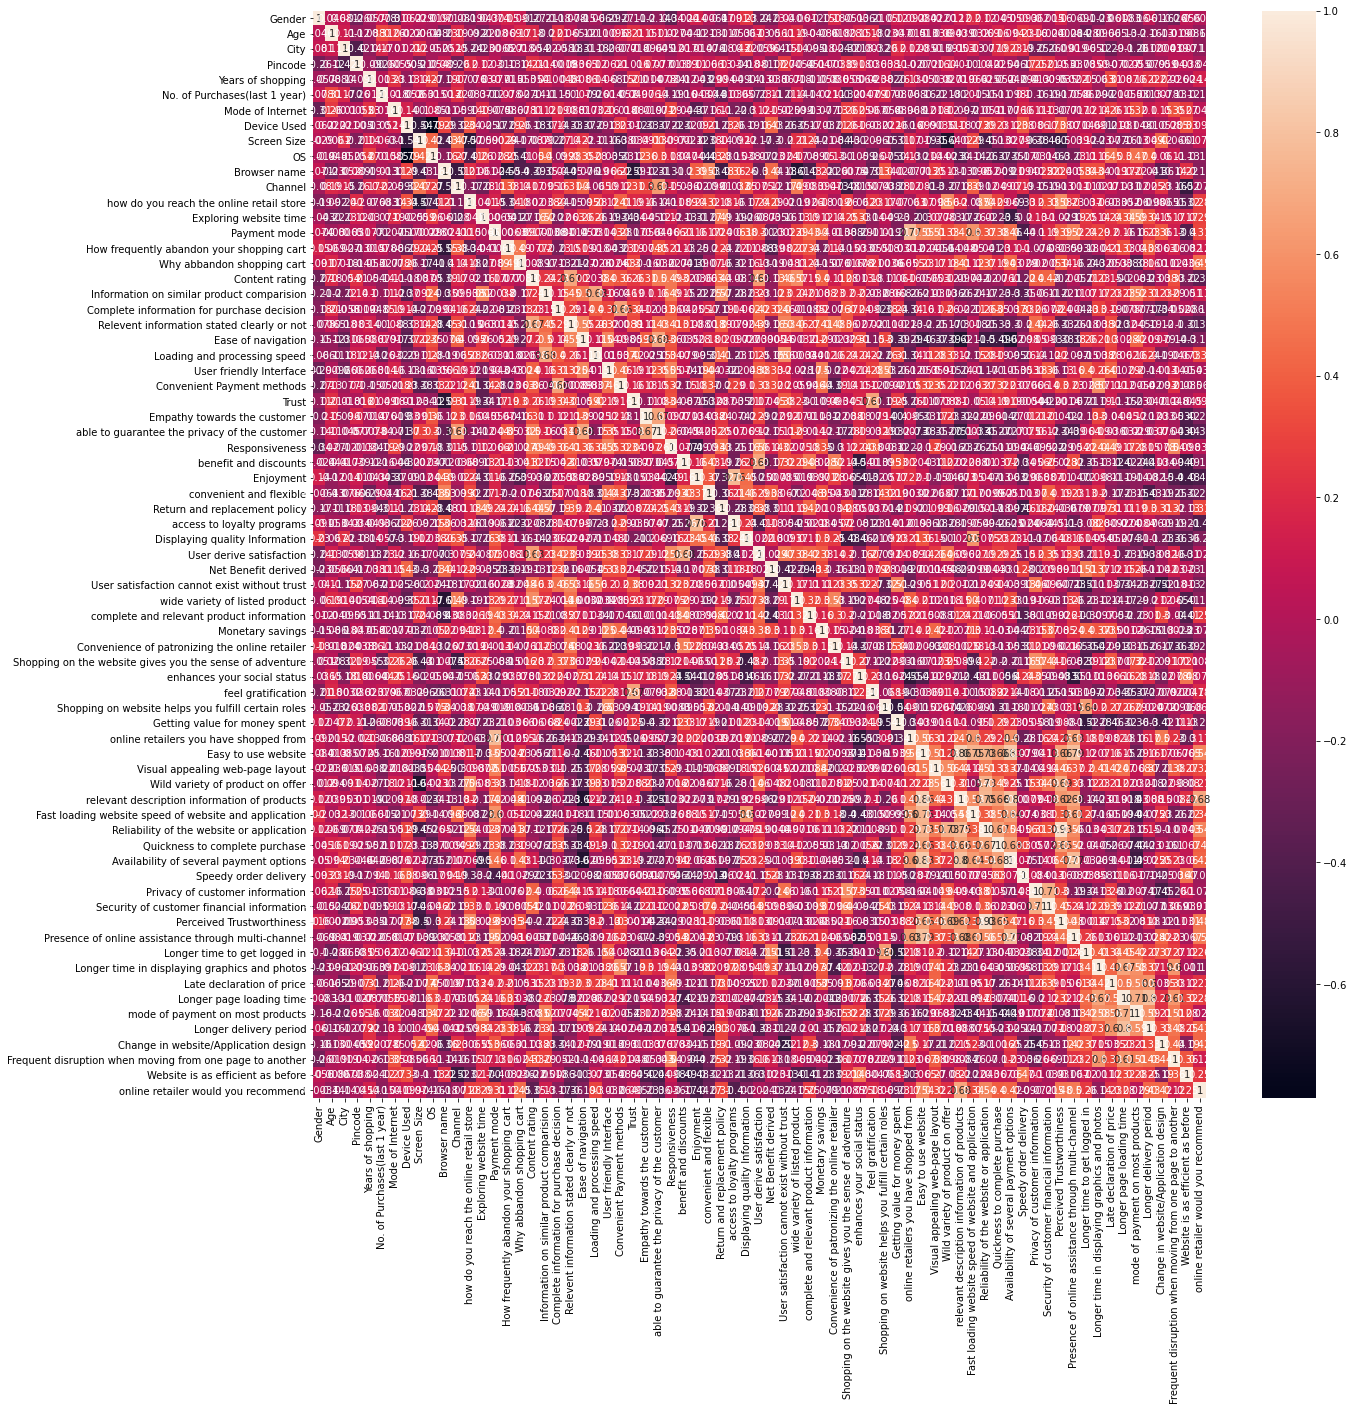

In [87]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [89]:
data.skew()

Gender                                                      0.741028
Age                                                         0.680987
City                                                        0.313729
Pincode                                                     1.748322
Years of shopping                                          -0.276968
                                                              ...   
Longer delivery period                                     -0.147702
Change in website/Application design                        0.354163
Frequent disruption when moving from one page to another   -0.100608
Website is as efficient as before                           0.662084
online retailer would you recommend                         0.583614
Length: 71, dtype: float64

Some skewness present in the dataset let's remove it

#### Removing skewness using power transform 

In [90]:
from sklearn.preprocessing import power_transform
data_new=power_transform(data)

#### Scaling the dataset

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_new=sc.fit_transform(data_new)
data_new

array([[ 1.43416114e+00, -6.80588196e-02, -6.95625009e-01, ...,
        -1.49569060e+00, -1.18573039e+00,  1.30662280e+00],
       [-6.97271716e-01, -1.32399122e+00, -6.95625009e-01, ...,
         2.44921038e-01, -2.32457627e-01,  5.76359546e-01],
       [-6.97271716e-01, -1.32399122e+00,  1.21093689e-03, ...,
         9.32512819e-01, -1.18573039e+00,  1.10620423e+00],
       ...,
       [-6.97271716e-01,  7.17043338e-01, -1.69206513e+00, ...,
         1.25402345e+00, -1.18573039e+00, -1.26488089e+00],
       [-6.97271716e-01,  1.76269768e+00,  1.51555165e+00, ...,
         5.97173096e-01,  1.21590474e+00, -1.26488089e+00],
       [-6.97271716e-01,  7.17043338e-01, -3.26067362e-01, ...,
        -1.49569060e+00, -1.18573039e+00, -1.26488089e+00]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(data_new,i)for i in range(data_new.shape[1])]
vif['features']=data.columns
vif

,vif,features
0,2.107793,Gender
1,1.686514,Age
2,1.670581,City
3,NaN,Pincode
4,1.691013,Years of shopping
...,...,...
66,inf,Longer delivery period
67,inf,Change in website/Application design
68,inf,Frequent disruption when moving from one page ...
69,inf,Website is as efficient as before


In [102]:
vif.tail(10)

,vif,features
61,inf,Longer time to get logged in
62,inf,Longer time in displaying graphics and photos
63,inf,Late declaration of price
64,inf,Longer page loading time
65,inf,mode of payment on most products
66,inf,Longer delivery period
67,inf,Change in website/Application design
68,inf,Frequent disruption when moving from one page ...
69,inf,Website is as efficient as before
70,inf,online retailer would you recommend
